In [15]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

# Benchmarks

In [3]:
benchmarks = {}
for celltype in ['5HT', 'GABA', 'mPFC']:
    benchmarks[celltype] = {
        'Md': pd.read_csv('{}_goodcellsbenchmark_Md_8.csv'.format(celltype)),
        'R2V': pd.read_csv('{}_goodcellsbenchmark_R2_V.csv'.format(celltype)),
        'R2dV': pd.read_csv('{}_goodcellsbenchmark_R2_dV.csv'.format(celltype))
    }

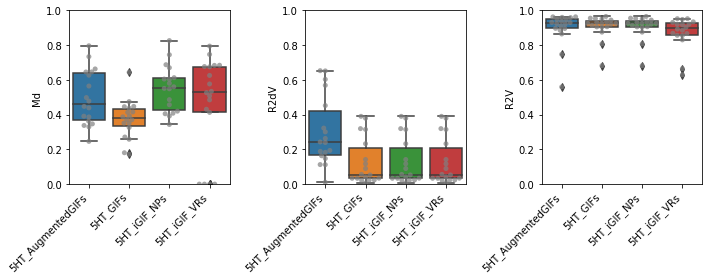

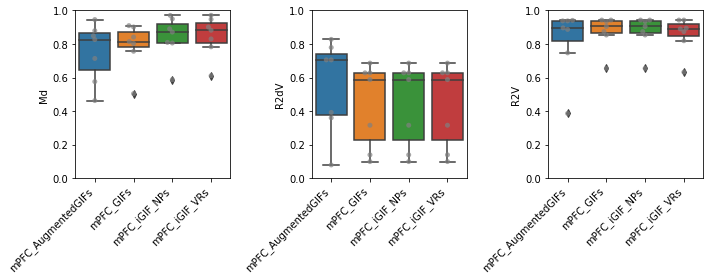

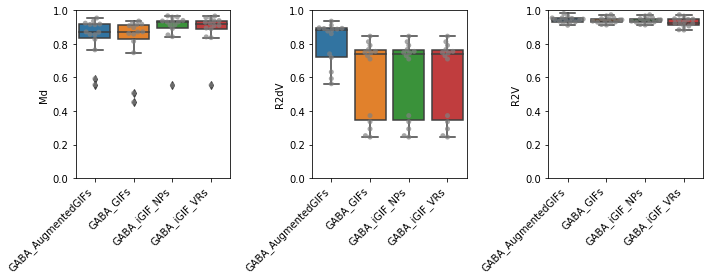

In [4]:
for celltype in benchmarks:
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    axes = axes.flatten().tolist()
    
    for i, benchtype in enumerate(benchmarks[celltype]):
        axes[i].set_ylim(0, 1)
        chart = sns.boxplot(
            x='variable', y='value', data=benchmarks[celltype][benchtype].melt(id_vars=['Cell']), 
            ax=axes[i]
        )
        sns.swarmplot(
            x='variable', y='value', data=benchmarks[celltype][benchtype].melt(id_vars=['Cell']), 
            ax=axes[i], color='gray', alpha=0.7
        )
        axes[i].set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylabel(benchtype)
        axes[i].set_xlabel('')
    
    plt.tight_layout()

## Selected benchmarks

Most important benchmarks for presentations, etc.

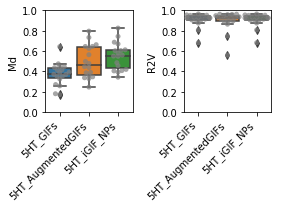

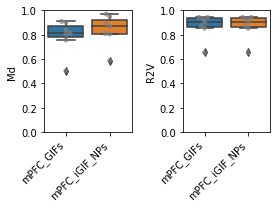

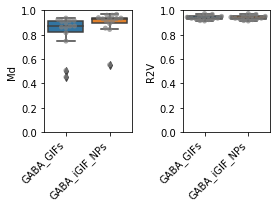

In [31]:
selected_mods = {
    '5HT': ['5HT_GIFs', '5HT_AugmentedGIFs', '5HT_iGIF_NPs'],
    'GABA': ['GABA_GIFs', 'GABA_iGIF_NPs'],
    'mPFC': ['mPFC_GIFs', 'mPFC_iGIF_NPs']
}
for celltype in benchmarks:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3))
    axes = axes.flatten().tolist()
    
    for i, benchtype in enumerate(['Md', 'R2V']):
        cols = ['Cell']
        cols.extend(selected_mods[celltype])
        data_filtered = benchmarks[celltype][benchtype].loc[:, cols]
        
        axes[i].set_ylim(0, 1)
        chart = sns.boxplot(
            x='variable', y='value', data=data_filtered.melt(id_vars=['Cell']), 
            ax=axes[i]
        )
        sns.swarmplot(
            x='variable', y='value', data=data_filtered.melt(id_vars=['Cell']), 
            ax=axes[i], color='gray', alpha=0.7
        )
        axes[i].set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylabel(benchtype)
        axes[i].set_xlabel('')
    
    plt.tight_layout()

# Sample traces

In [12]:
sample_traces = {}
for celltype in ['GABA', '5HT', 'mPFC']:
    with open(
        os.path.join(
            '..', '..', 'data', 'models', celltype, '{}_goodcellsbenchmark_sample_traces.pkl'.format(celltype)
        ), 'rb'
    ) as f:
        sample_traces[celltype] = pd.DataFrame(pickle.load(f))
        f.close()

In [13]:
sample_traces['5HT'].head()

,5HT_AugmentedGIFs,5HT_GIFs,5HT_iGIF_NPs,5HT_iGIF_VRs,Cell,Data,Input,Time
0,"{u'V': [-62.442818307124725, -62.4441246025790...","{u'V': [-62.442818307124725, -62.4446147954875...","{u'V': [-62.442818307124725, -62.4446147954875...","{u'V': [-62.442818307124725, -62.4446147954875...",DRN307,"{u'V': [-62.442818307124725, -62.4416838859438...","[0.00042724612285383046, 0.00048828125, 0.0001...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
1,"{u'V': [-66.37479065386647, -66.37403872120107...","{u'V': [-66.37479065386647, -66.37514956865456...","{u'V': [-66.37479065386647, -66.37514956865456...","{u'V': [-66.37479065386647, -66.37514956865456...",DRN308,"{u'V': [-66.37479065386647, -66.2586569929167,...","[0.01837158203125, 0.01849365234375, 0.0180664...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
2,"{u'V': [-54.206462821031465, -54.2082484004431...","{u'V': [-54.206462821031465, -54.2096538998659...","{u'V': [-54.206462821031465, -54.2096538998659...","{u'V': [-54.206462821031465, -54.2096538998659...",DRN317,"{u'V': [-54.206462821031465, -54.3422294266175...","[0.02050781436264515, 0.02020263858139515, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
3,"{u'V': [-50.298228146284906, -50.3002413386997...","{u'V': [-50.298228146284906, -50.3051384179678...","{u'V': [-50.298228146284906, -50.3051384179678...","{u'V': [-50.298228146284906, -50.3051384179678...",DRN318,"{u'V': [-50.298228146284906, -50.2945266948501...","[0.015441895462572575, 0.015441895462572575, 0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
4,"{u'V': [-55.92712742962467, -55.93230993659001...","{u'V': [-55.92712742962467, -55.93765209684920...","{u'V': [-55.92712742962467, -55.93765209684920...","{u'V': [-55.92712742962467, -55.93765209684920...",DRN319,"{u'V': [-55.92712742962467, -56.09153353027749...","[-0.014465332962572575, -0.014831543900072575,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."


## mPFC sample traces

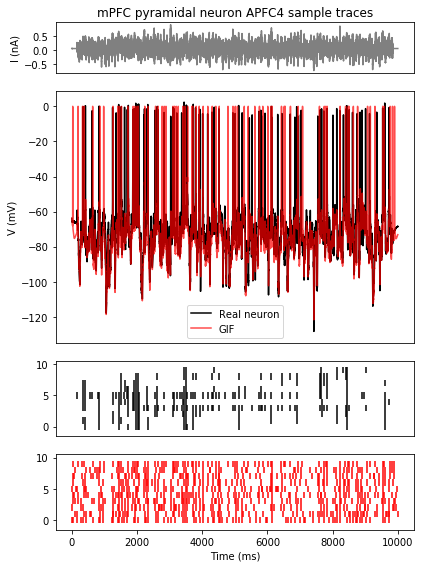

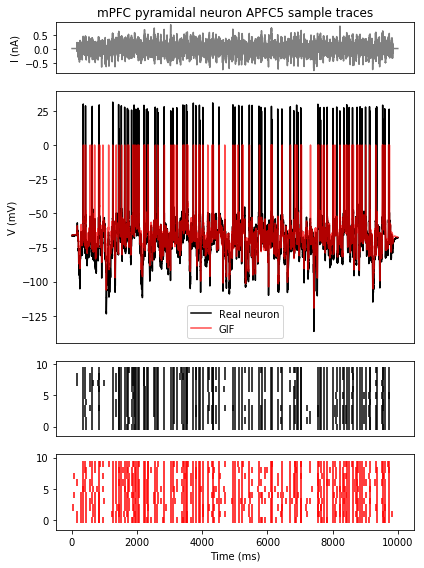

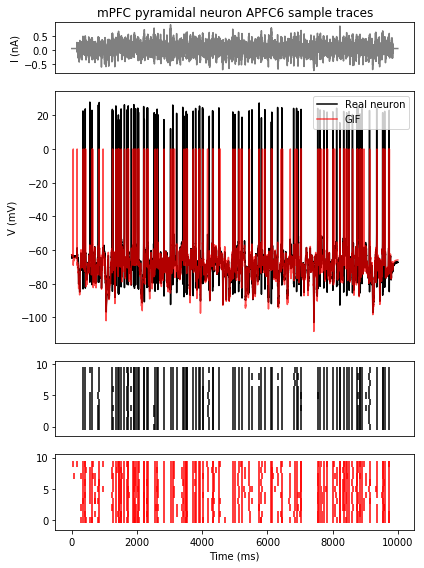

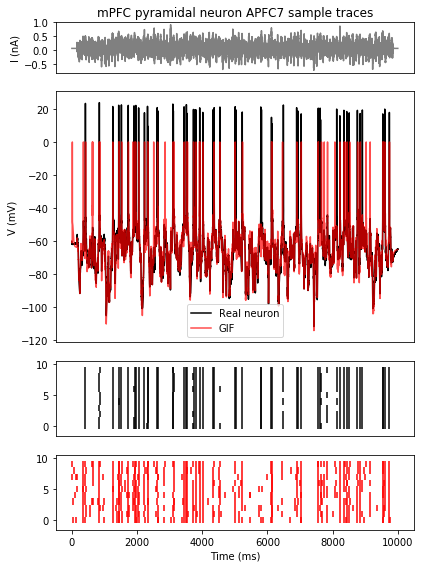

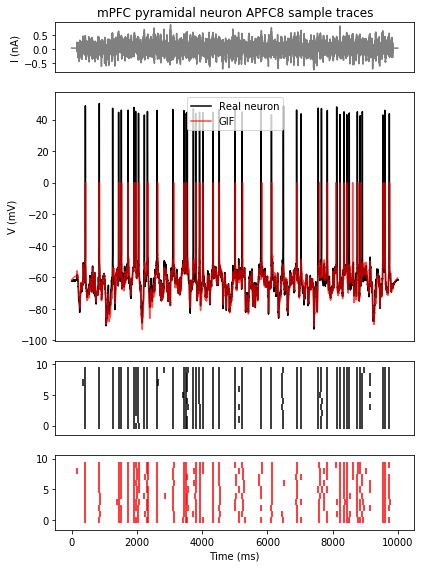

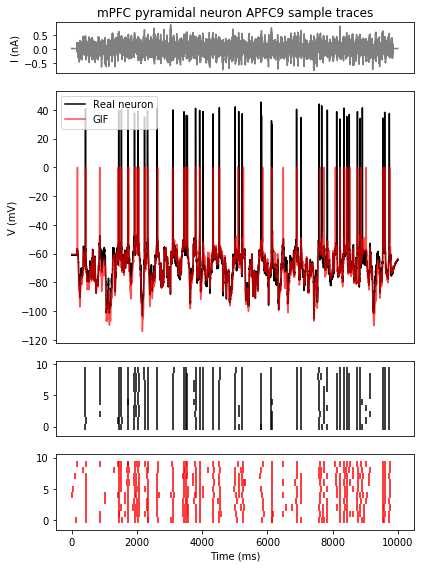

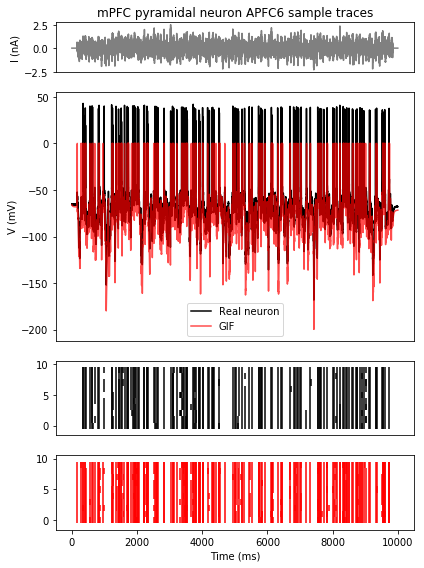

In [23]:
sample_tr_spec = gs.GridSpec(4, 1, height_ratios=[0.2, 1, 0.3, 0.3])

for i in range(sample_traces['mPFC'].shape[0]):
    plt.figure(figsize=(6, 8))
    
    plt.subplot(sample_tr_spec[0, :])
    plt.title('mPFC pyramidal neuron {} sample traces'.format(sample_traces['mPFC'].loc[i, 'Cell']))
    plt.plot(
        sample_traces['mPFC'].loc[i, 'Time'], 
        sample_traces['mPFC'].loc[i, 'Input'], 
        color='gray'
    )
    xlims = plt.xlim()
    plt.ylabel('I (nA)')
    plt.xticks([])
    
    plt.subplot(sample_tr_spec[1, :])
    plt.plot(
        sample_traces['mPFC'].loc[i, 'Time'], 
        sample_traces['mPFC'].loc[i, 'Data']['V'], 
        color='black', label='Real neuron'
    )
    plt.plot(
        sample_traces['mPFC'].loc[i, 'Time'], 
        sample_traces['mPFC'].loc[i, 'mPFC_GIFs']['V'], 
        color='r', alpha=0.7, label='GIF'
    )
    plt.xlim(xlims)
    plt.xticks([])
    plt.ylabel('V (mV)')
    plt.legend()
    
    plt.subplot(sample_tr_spec[2, :])
    plt.eventplot(sample_traces['mPFC'].loc[i, 'Data']['spks'], color='black')
    plt.xticks([])
    plt.xlim(xlims)
    
    plt.subplot(sample_tr_spec[3, :])
    plt.eventplot(sample_traces['mPFC'].loc[i, 'mPFC_GIFs']['spks'], color='red')
    plt.xlim(xlims)
    plt.xlabel('Time (ms)')
    
    plt.tight_layout()
    plt.show()

## GABA sample traces

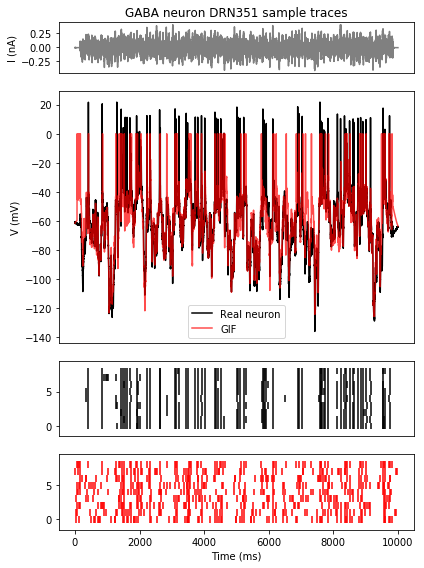

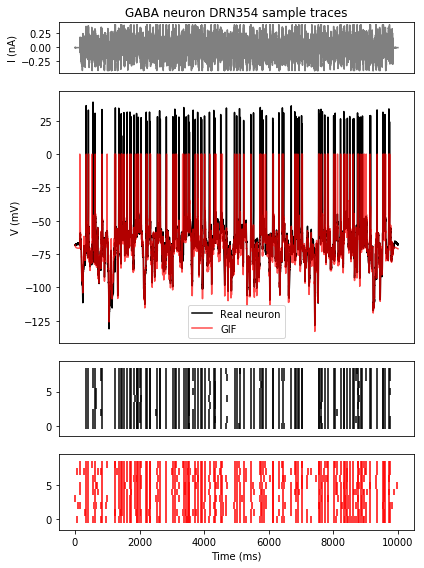

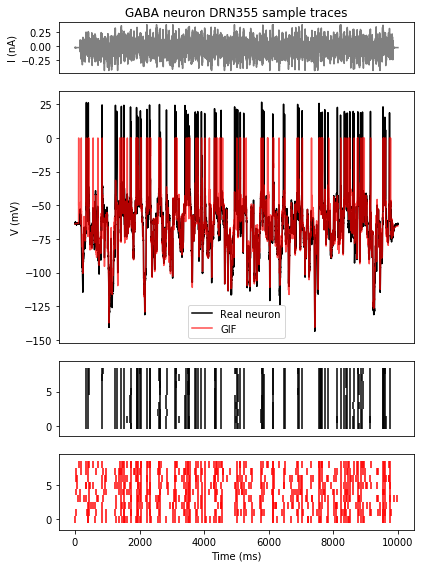

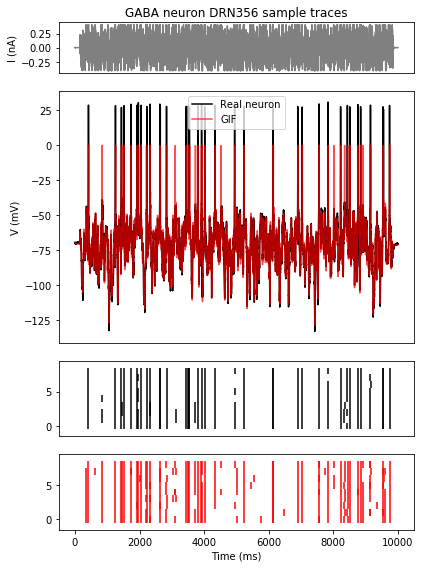

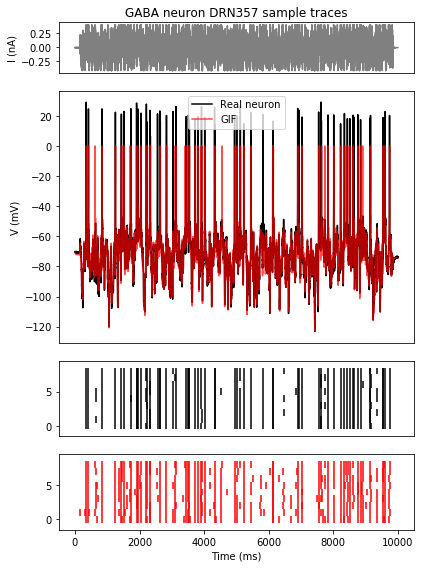

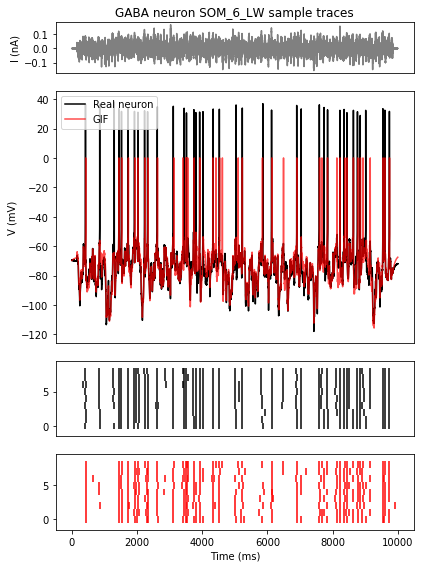

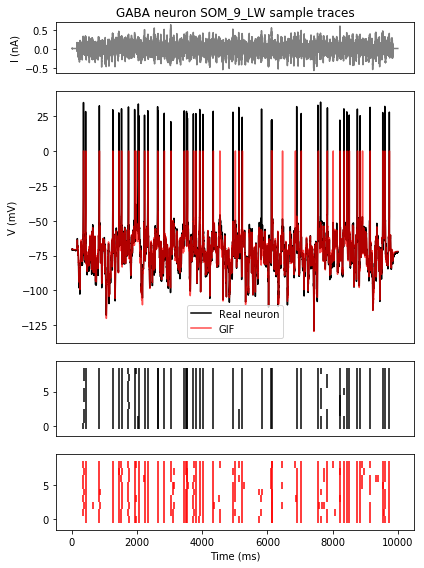

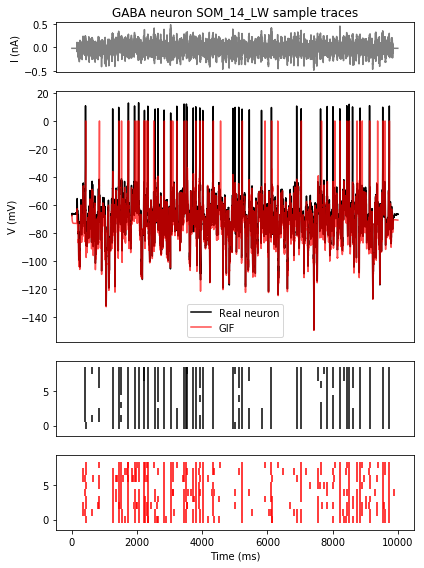

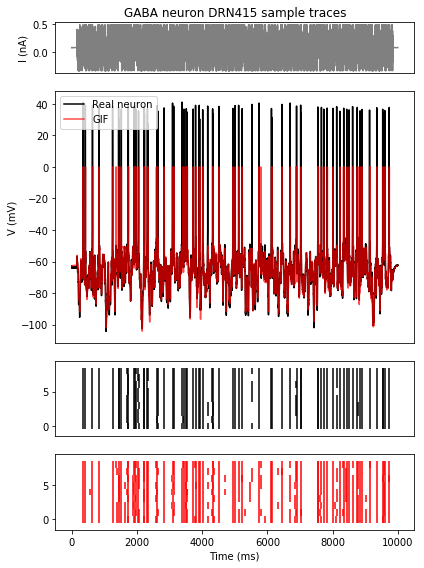

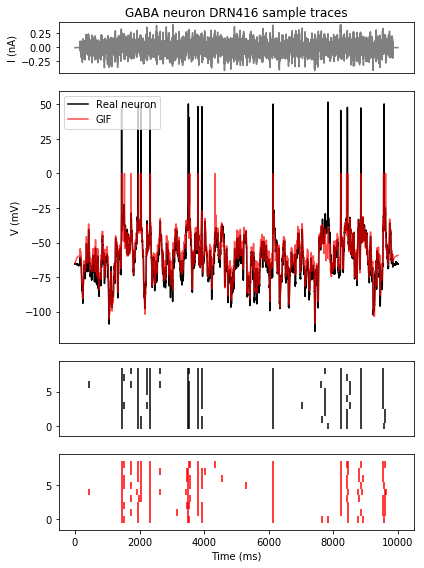

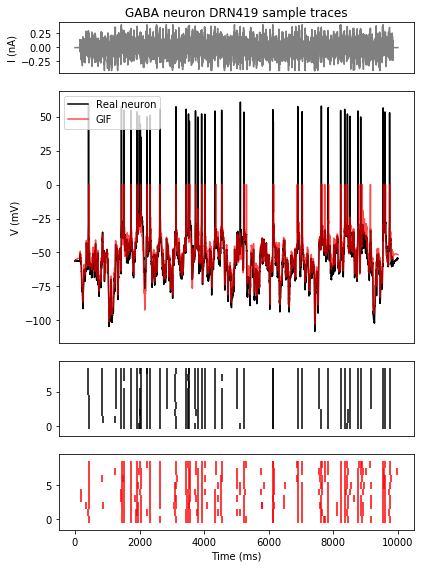

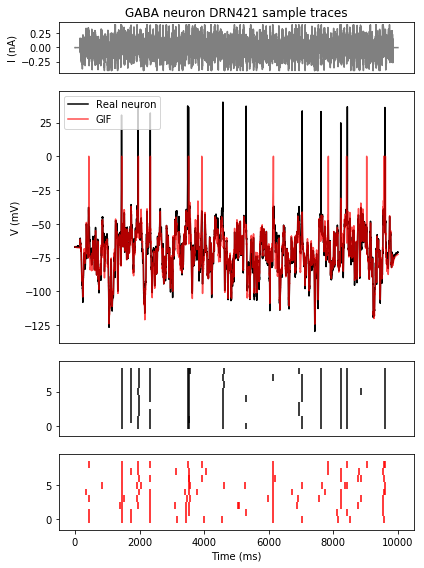

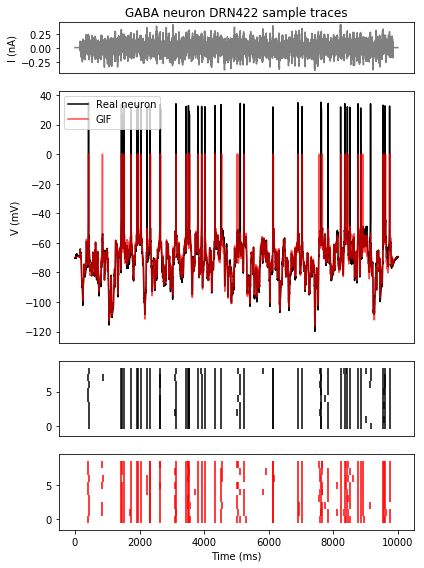

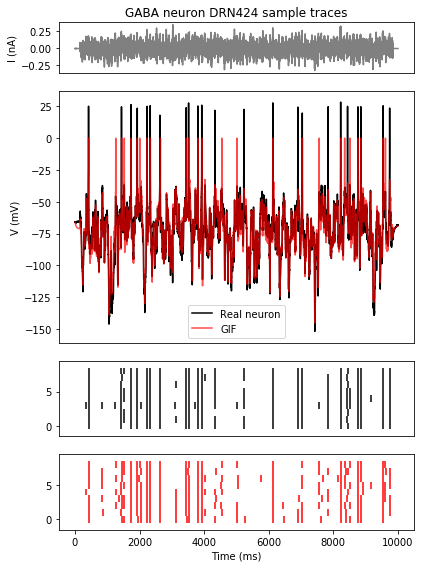

In [32]:
sample_tr_spec = gs.GridSpec(4, 1, height_ratios=[0.2, 1, 0.3, 0.3])

for i in range(sample_traces['GABA'].shape[0]):
    plt.figure(figsize=(6, 8))
    
    plt.subplot(sample_tr_spec[0, :])
    plt.title('GABA neuron {} sample traces'.format(sample_traces['GABA'].loc[i, 'Cell']))
    plt.plot(
        sample_traces['GABA'].loc[i, 'Time'], 
        sample_traces['GABA'].loc[i, 'Input'], 
        color='gray'
    )
    xlims = plt.xlim()
    plt.ylabel('I (nA)')
    plt.xticks([])
    
    plt.subplot(sample_tr_spec[1, :])
    plt.plot(
        sample_traces['GABA'].loc[i, 'Time'], 
        sample_traces['GABA'].loc[i, 'Data']['V'], 
        color='black', label='Real neuron'
    )
    plt.plot(
        sample_traces['GABA'].loc[i, 'Time'], 
        sample_traces['GABA'].loc[i, 'GABA_GIFs']['V'], 
        color='r', alpha=0.7, label='GIF'
    )
    plt.xlim(xlims)
    plt.xticks([])
    plt.ylabel('V (mV)')
    plt.legend()
    
    plt.subplot(sample_tr_spec[2, :])
    plt.eventplot(sample_traces['GABA'].loc[i, 'Data']['spks'], color='black')
    plt.xticks([])
    plt.xlim(xlims)
    
    plt.subplot(sample_tr_spec[3, :])
    plt.eventplot(sample_traces['GABA'].loc[i, 'GABA_GIFs']['spks'], color='red')
    plt.xlim(xlims)
    plt.xlabel('Time (ms)')
    
    plt.tight_layout()
    plt.show()

## 5HT sample traces

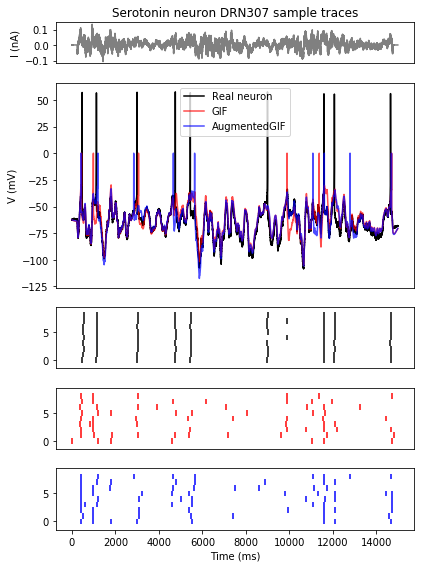

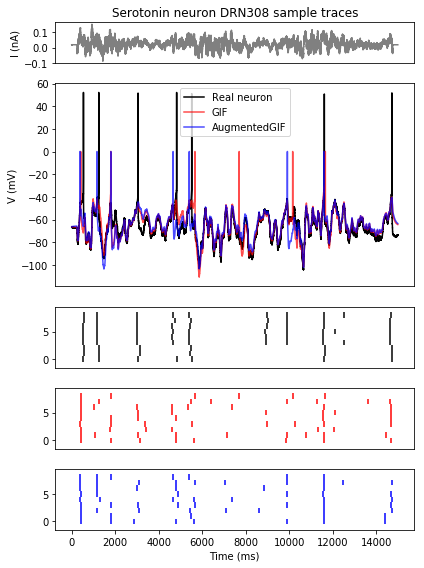

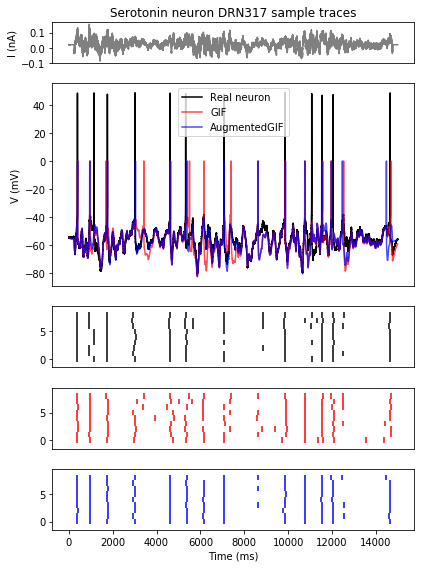

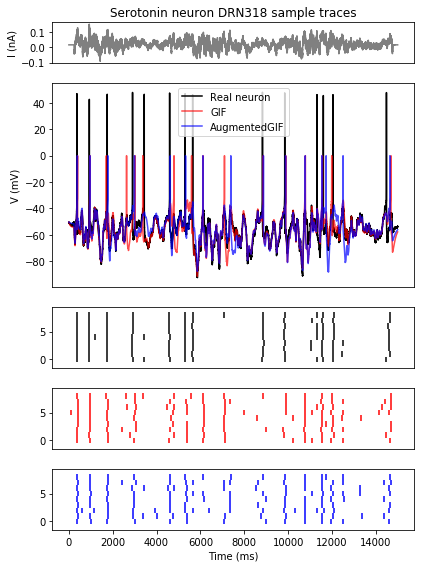

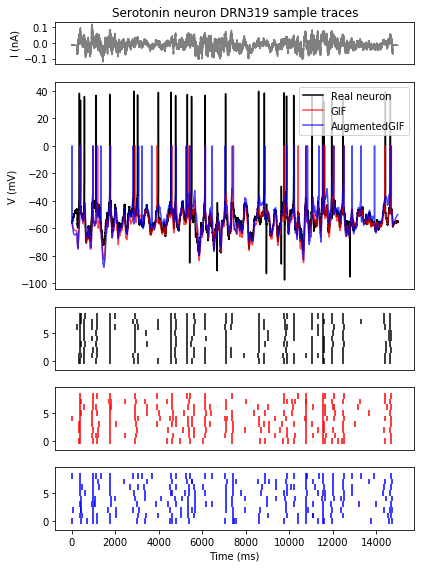

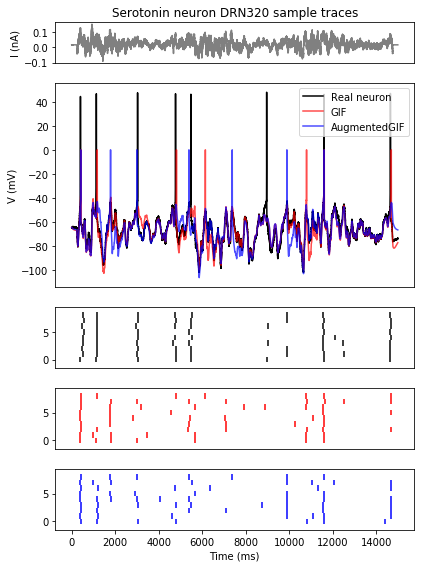

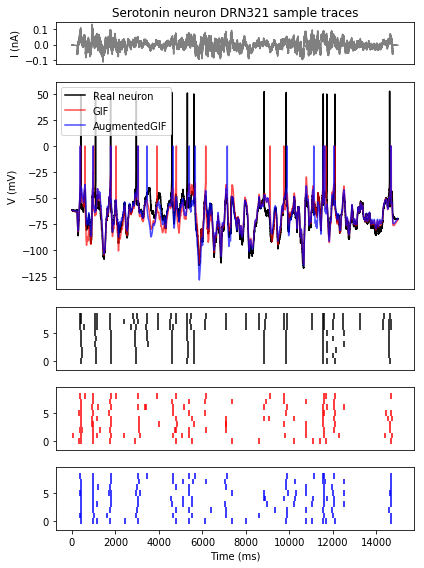

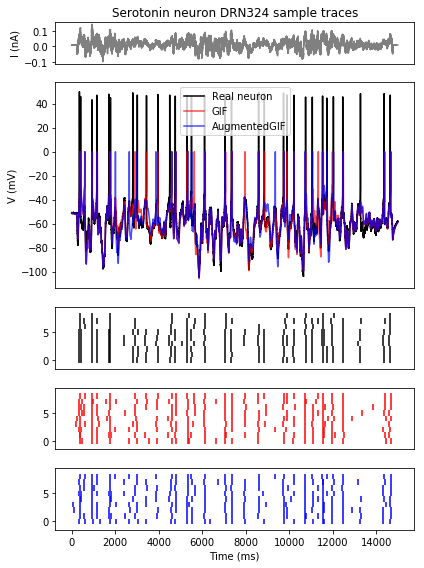

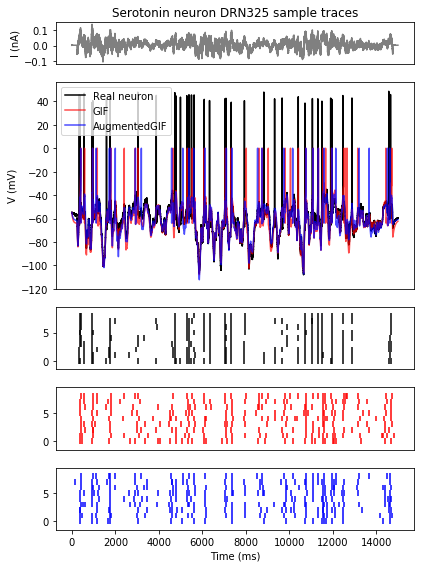

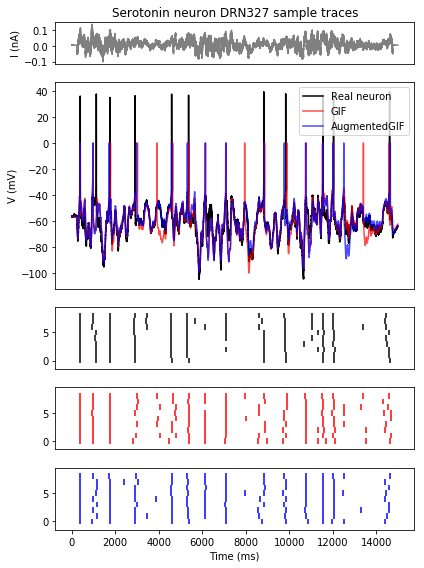

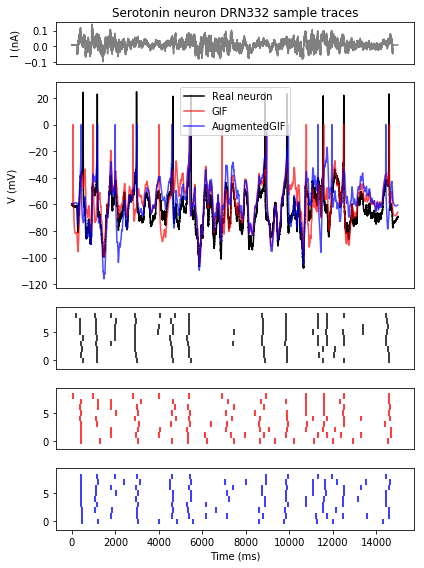

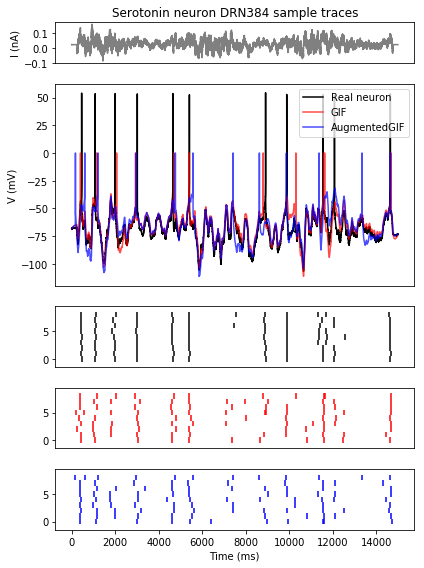

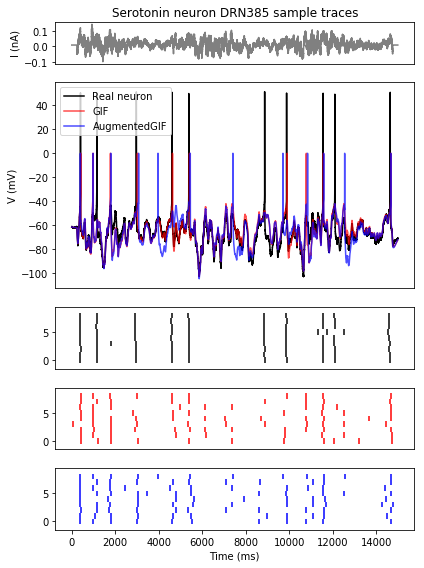

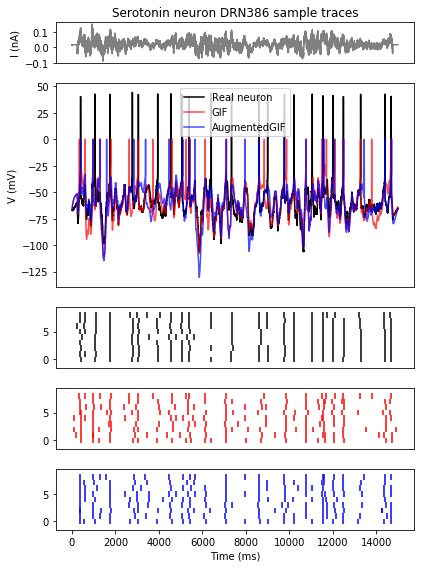

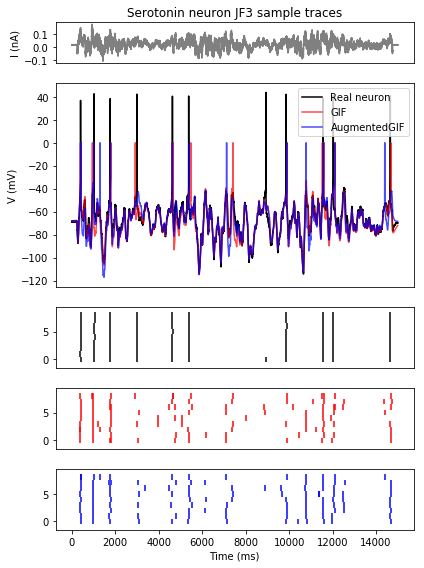

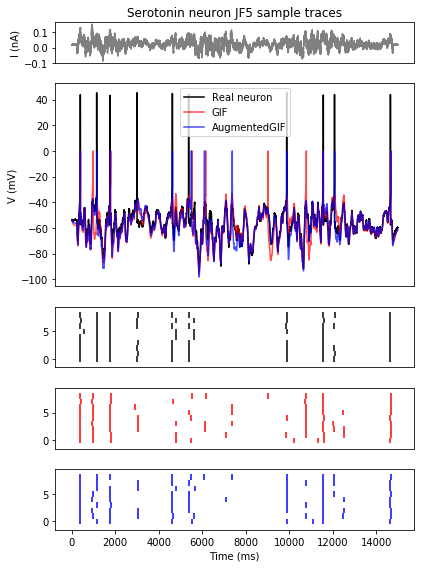

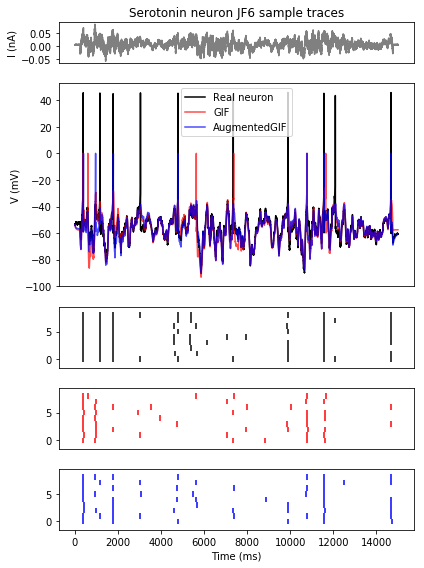

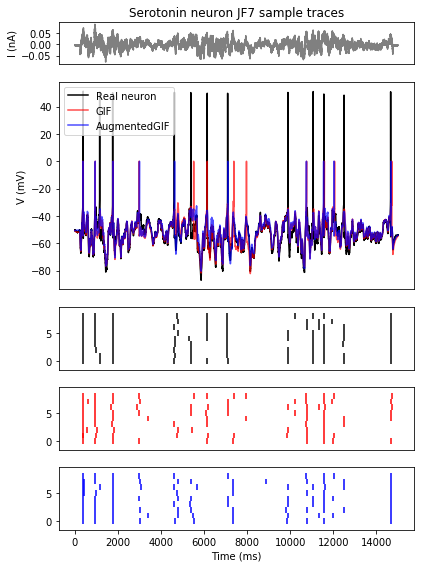

In [22]:
sample_tr_spec = gs.GridSpec(5, 1, height_ratios=[0.2, 1, 0.3, 0.3, 0.3])

for i in range(sample_traces['5HT'].shape[0]):
    plt.figure(figsize=(6, 8))
    
    plt.subplot(sample_tr_spec[0, :])
    plt.title('Serotonin neuron {} sample traces'.format(sample_traces['5HT'].loc[i, 'Cell']))
    plt.plot(
        sample_traces['5HT'].loc[i, 'Time'], 
        sample_traces['5HT'].loc[i, 'Input'], 
        color='gray'
    )
    xlims = plt.xlim()
    plt.ylabel('I (nA)')
    plt.xticks([])
    
    plt.subplot(sample_tr_spec[1, :])
    plt.plot(
        sample_traces['5HT'].loc[i, 'Time'], 
        sample_traces['5HT'].loc[i, 'Data']['V'], 
        color='black', label='Real neuron'
    )
    plt.plot(
        sample_traces['5HT'].loc[i, 'Time'], 
        sample_traces['5HT'].loc[i, '5HT_GIFs']['V'], 
        color='r', alpha=0.7, label='GIF'
    )
    plt.plot(
        sample_traces['5HT'].loc[i, 'Time'], 
        sample_traces['5HT'].loc[i, '5HT_AugmentedGIFs']['V'], 
        color='b', alpha=0.7, label='AugmentedGIF'
    )
    plt.xlim(xlims)
    plt.xticks([])
    plt.ylabel('V (mV)')
    plt.legend()
    
    plt.subplot(sample_tr_spec[2, :])
    plt.eventplot(sample_traces['5HT'].loc[i, 'Data']['spks'], color='black')
    plt.xticks([])
    plt.xlim(xlims)
    
    plt.subplot(sample_tr_spec[3, :])
    plt.eventplot(sample_traces['5HT'].loc[i, '5HT_GIFs']['spks'], color='red')
    plt.xticks([])
    plt.xlim(xlims)
    
    plt.subplot(sample_tr_spec[4, :])
    plt.eventplot(sample_traces['5HT'].loc[i, '5HT_AugmentedGIFs']['spks'], color='blue')
    plt.xlim(xlims)
    plt.xlabel('Time (ms)')
    
    plt.tight_layout()
    plt.show()